## **Implementasi Fuzzy Logic Dalam Menentukan Pemesanan Obat Pada Bulan April 2020**

In [74]:
!pip install scikit-fuzzy

In [75]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [83]:
persediaan = ctrl.Antecedent(np.arange(0, 41, 1), 'persediaan')
penjualan = ctrl.Antecedent(np.arange(0, 21, 1), 'penjualan')
pemesanan = ctrl.Consequent(np.arange(0, 41, 1), 'pemesanan')

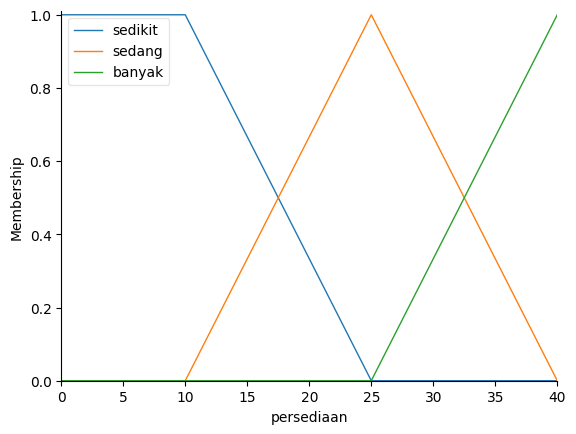

In [84]:
persediaan['sedikit'] = fuzz.trapmf(persediaan.universe, [0, 0, 10, 25])
persediaan['sedang'] = fuzz.trimf(persediaan.universe, [10, 25, 40])
persediaan['banyak'] = fuzz.trimf(persediaan.universe, [25, 40, 40])

persediaan.view()

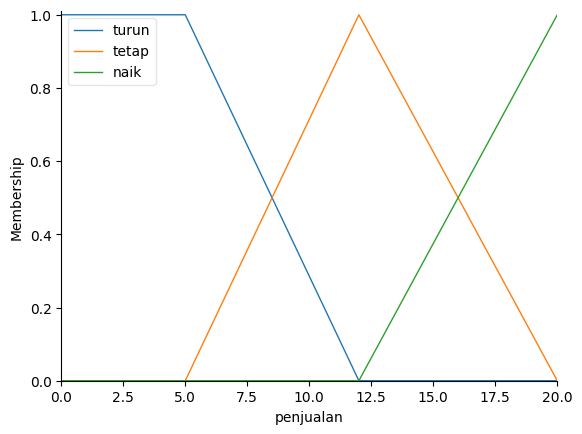

In [85]:
penjualan['turun'] = fuzz.trapmf(penjualan.universe, [0, 0, 5, 12])
penjualan['tetap'] = fuzz.trimf(penjualan.universe, [5, 12, 20])
penjualan['naik'] = fuzz.trimf(penjualan.universe, [12, 20, 20])

penjualan.view()

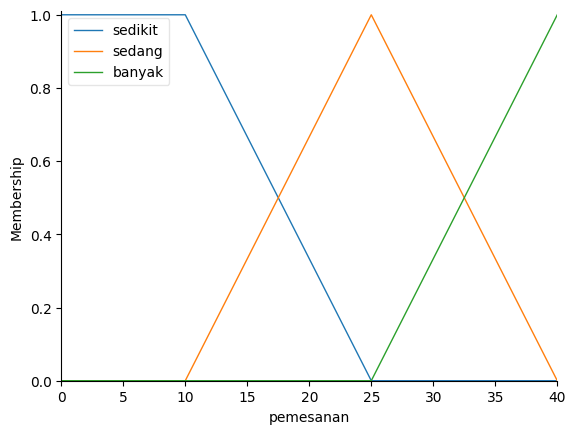

In [86]:
pemesanan['sedikit'] = fuzz.trapmf(pemesanan.universe, [0, 0, 10, 25])
pemesanan['sedang'] = fuzz.trimf(pemesanan.universe, [10, 25, 40])
pemesanan['banyak'] = fuzz.trimf(pemesanan.universe, [25, 40, 40])

pemesanan.view()

In [87]:
rule1 = ctrl.Rule(penjualan['turun'] & persediaan['banyak'], pemesanan['sedikit'])
rule2 = ctrl.Rule(penjualan['turun'] & persediaan['sedang'],  pemesanan['sedikit'])
rule3 = ctrl.Rule(penjualan['turun'] & persediaan['sedikit'],  pemesanan['sedikit'])
rule4 = ctrl.Rule(penjualan['tetap'] & persediaan['banyak'], pemesanan['sedikit'])
rule5 = ctrl.Rule(penjualan['tetap'] & persediaan['sedang'],  pemesanan['sedang'])
rule6 = ctrl.Rule(penjualan['tetap'] & persediaan['sedikit'],  pemesanan['banyak'])
rule7 = ctrl.Rule(penjualan['naik']  & persediaan['banyak'], pemesanan['banyak'])
rule8 = ctrl.Rule(penjualan['naik']  & persediaan['sedang'],  pemesanan['banyak'])
rule9 = ctrl.Rule(penjualan['naik']  & persediaan['sedikit'],  pemesanan['banyak'])

In [88]:
pemesanan_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3,
    rule4, rule5, rule6,
    rule7, rule8, rule9
])

Hasil defuzzifikasi pemesanan: 21.48


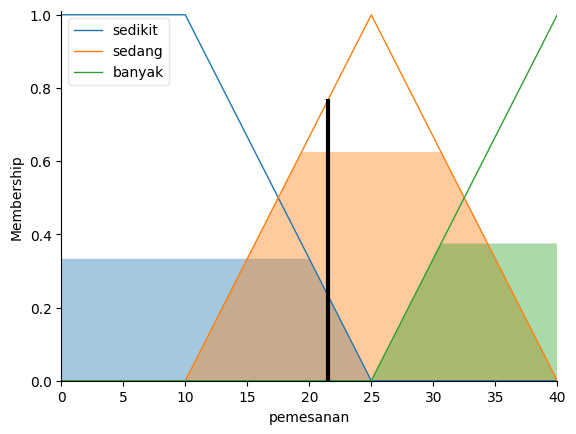

In [89]:
pemesanan_simulasi = ctrl.ControlSystemSimulation(pemesanan_ctrl)

pemesanan_simulasi.input['penjualan'] = 15
pemesanan_simulasi.input['persediaan'] = 30

pemesanan_simulasi.compute()

print("Hasil defuzzifikasi pemesanan:", round(pemesanan_simulasi.output['pemesanan'], 2))

pemesanan.view(sim=pemesanan_simulasi)